## Geocoding in Geopandas
It is possible to do geocoding in Geopandas using its integrated functionalities of geopy. Geopandas has a function called geocode() that can geocode a list of addresses (strings) and return a GeoDataFrame containing the resulting point objects in geometry column. Nice, isn’t it! Let’s try this out.

In [8]:
# Import necessary modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas.tools import geocode

In [7]:
# Filepath
fp = r"data/addresses.txt"

# Read the data
data = pd.read_csv(fp, sep=';')
data.head()

,id,addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


In [9]:
# Geocode the addresses
geo = geocode(data['addr'], provider='nominatim')
geo

,address,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",POINT (24.9155655 60.1632005)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",POINT (24.9316914 60.1690222)
2,"Citycenter, 8, Kaivokatu, Keskusta, Kluuvi, Et...",POINT (24.94244049213 60.16988445)
3,"Hermannin rantatie, Kyläsaari, Hermanni, Helsi...",POINT (24.9709473 60.1975589)
4,"Hesburger Jätkäsaari, 9, Tyynenmerenkatu, Jätk...",POINT (24.9215601 60.1566956)
5,"Kontulantie, Kontula, Mellunkylä, Helsinki, He...",POINT (25.0806532 60.2334106)
6,"Itäväylä, Vartioharju, Vartiokylä, Helsinki, H...",POINT (25.1109579 60.2216552)
7,"3-5, Tapulikaupungintie, Tapulikaupunki, Suuta...",POINT (25.0331561080774 60.2777903)
8,"Sompionpolku, Tapanila, Tapaninkylä, Helsinki,...",POINT (25.0291169 60.2636285)
9,"Sodexo, 5, Atomitie, Pitäjänmäen yritysalue, P...",POINT (24.8710287 60.222498)


In [11]:
type(geo)

geopandas.geodataframe.GeoDataFrame

In [12]:
# Join the DataFrames together (by index)
geo = geo.join(data)
geo.head()

,address,geometry,id,addr
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",POINT (24.9155655 60.1632005),1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",POINT (24.9316914 60.1690222),1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,"Citycenter, 8, Kaivokatu, Keskusta, Kluuvi, Et...",POINT (24.94244049213 60.16988445),1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,"Hermannin rantatie, Kyläsaari, Hermanni, Helsi...",POINT (24.9709473 60.1975589),1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,"Hesburger Jätkäsaari, 9, Tyynenmerenkatu, Jätk...",POINT (24.9215601 60.1566956),1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


#### Cartoframes plot

In [23]:
import cartoframes
from cartoframes import Credentials, CartoContext
from cartoframes import Layer, BaseMap, styling
creds = Credentials(username='cccruzr', key='e52dd7f06099793346a9d12f07b1ce97ed703e53')
creds.save()

In [18]:
BASEURL = r'https://cccruzr.carto.com/'
APIKEY = 'e52dd7f06099793346a9d12f07b1ce97ed703e53'
cc = cartoframes.CartoContext(BASEURL, APIKEY)

In [19]:
print(creds)

Credentials(username=cccruzr, key=e52dd7f06099793346a9d12f07b1ce97ed703e53, base_url=https://cccruzr.carto.com)


In [21]:
cc.write(geo,'autogis_3_1_data')

Table successfully written to CARTO: https://cccruzr.carto.com/dataset/autogis_3_1_data


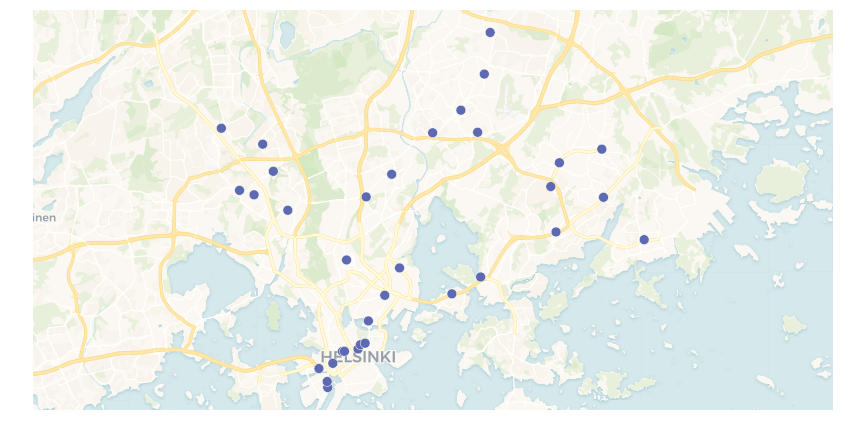

In [27]:
%matplotlib inline
cc.map(layers=[BaseMap('voyager'),
               Layer('autogis_3_1_data')],
       interactive=False)


In [28]:
# Save to disk
out_fp = r"data/addresses_geocode.shp"
geo.to_file(out_fp)